# Ejercicio 1

### Inciso a) 
Escribe un programa que lea los datos y haga una grafica de las manchas solares en funcion del tiempo.

In [35]:
#Acá lo que hago es hacer una lista vacía, en la cual se guardarán los datos del archivo.

datos= []

#Aquí defino la variable "entrada" como los datos del archivo.
entrada = open('manchasolares2.txt','r')

#En esta parte utizo datos.append para ir guardando los datos en la misma lista vacía.
for linea in entrada:
    datos.append(linea)

In [36]:
#En esta parte, me enfoco en que se abran solo los datos de cada una de las columnas por separado.
import numpy as np
A= []
B= []

for d in datos:
    data = d.split('\t')
    A.append(float(data[0].strip()))
    B.append(float(data[1].strip()))

A= np.array(A)
B= np.array(B)

In [37]:
print(A)

[0.000e+00 1.000e+00 2.000e+00 ... 3.140e+03 3.141e+03 3.142e+03]


In [38]:
print(B)

[58.  62.6 70.  ... 25.2 23.5 21.6]


In [39]:
import matplotlib.pyplot as plt


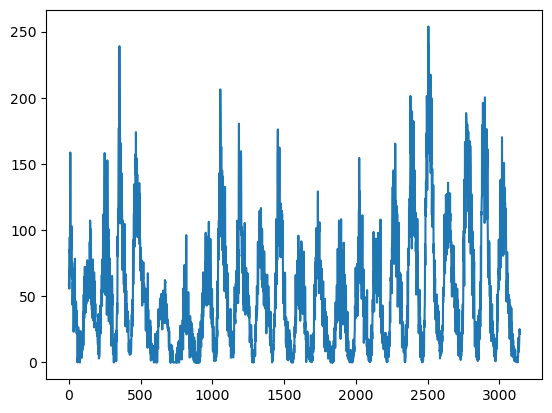

In [40]:
plt.plot(A,B)
plt.title("Datos de manchas solares")
plt.xlabel("Tiempo")
plt.ylabel("Número de manchas solares")

### Inciso b) 
Modifica tu programa para mostrar solo los primeros 1000 datos (experimentales) en la grafica.  ́

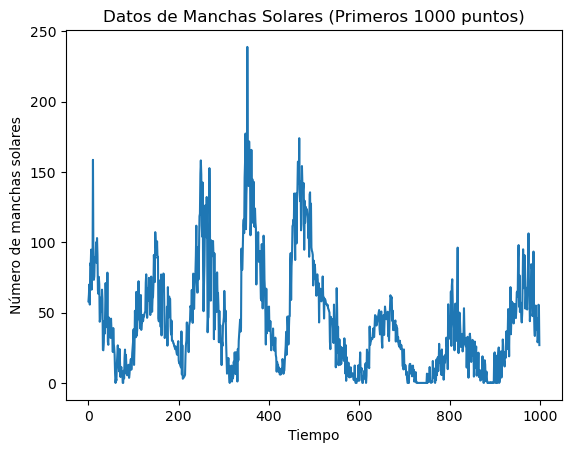

In [44]:

A = np.array(A)
B = np.array(B)

A_subset = A[:1000]
B_subset = B[:1000]

plt.plot(A_subset, B_subset)
plt.xlabel('Tiempo')
plt.ylabel('Número de manchas solares')
plt.title('Datos de Manchas Solares (Primeros 1000 puntos)')
plt.show()


### Inciso c)
Modifica nuevamente tu programa para calcular y graficar la media (promedio) movil de los datos
donde r = 5 (en este caso) y y_k son los numeros de manchas solares. 
El programa debe graficar tanto los datos originales como la media movil en el mismo grafico, solo sobre los primeros 1000 datos.  ́


In [46]:
r = 5
n = len(B_subset)
media_movil = np.zeros(n)

for k in range(n):
    suma = 0
    count = 0
    for m in range(-r, r + 1):
        if 0 <= k + m < n: 
            suma += B_subset[k + m]
            count += 1
    media_movil[k] = suma / (2 * r + 1) if count > 0 else 0

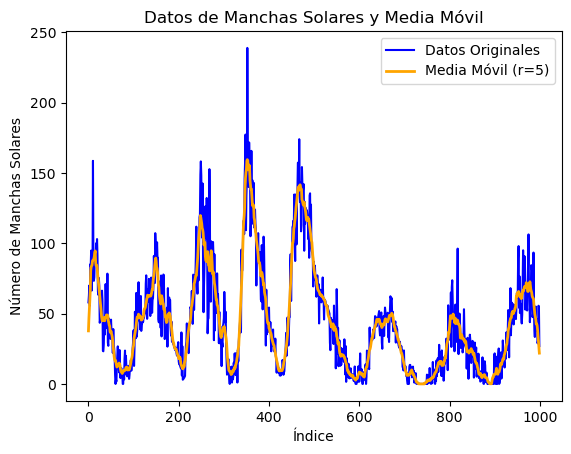

In [47]:
plt.plot(B_subset, label='Datos Originales', color='blue')
plt.plot(media_movil, label='Media Móvil (r=5)', color='orange', linewidth=2)
plt.xlabel('Índice')
plt.ylabel('Número de Manchas Solares')
plt.title('Datos de Manchas Solares y Media Móvil')
plt.legend()
plt.show()

# Ejercicio 2

### Inciso a)

In [48]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt

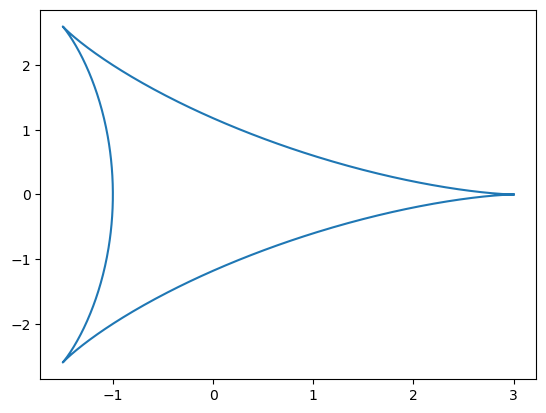

In [9]:
theta = np.linspace(0, 2*np.pi, 1000)
x= 2 * np.cos(theta) + np.cos(2*theta)
y= 2 * np.sin(theta) - np.sin(2*theta)

plt.plot(x,y)


### Inciso b)

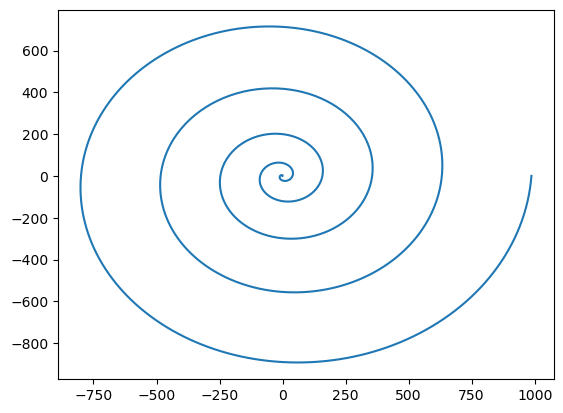

In [ ]:
theta = np.linspace(0,10*mt.pi,1000)
r= theta**2
x= r*np.cos(theta)
y= r*np.sin(theta)

plt.plot(x,y)

### Inciso c)

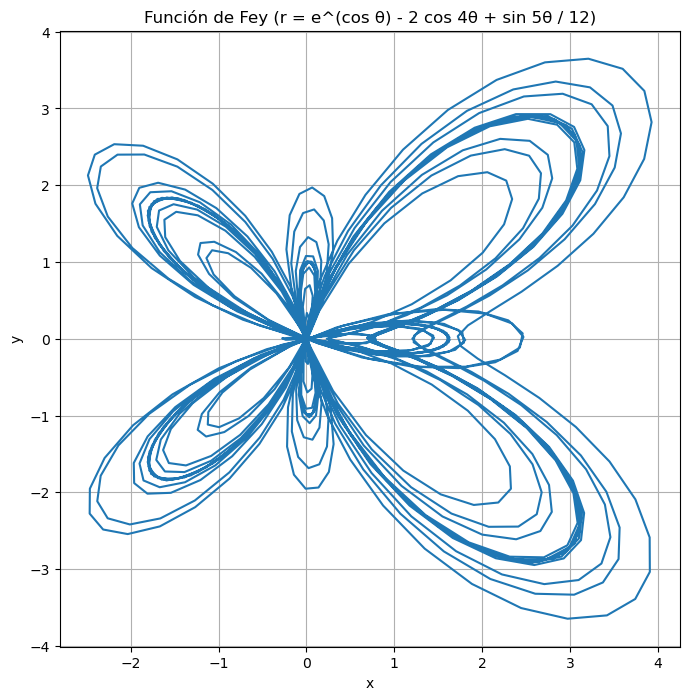

In [50]:

import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores de θ
theta = np.linspace(0, 24 * np.pi,1000 )

# Calcular r para cada valor de θ (función de Fey)
r = np.exp(np.cos(theta)) - 2*np.cos(4*theta) + np.sin(theta/12)**5

# Convertir a coordenadas cartesianas
x = r * np.cos(theta)
y = r * np.sin(theta)

# Crear la gráfica polar
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.title('Función de Fey (r = e^(cos θ) - 2 cos 4θ + sin 5θ / 12)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


# Ejercicio 3

### Inciso a)
Escribe un programa que simule una caminata aleatoria para N pasos y haz una grafica de las posiciones de la caminata vs el tiempo. Asimismo, grafica un histograma de la frecuencia de dichas posiciones. Puedes considerar l = 1, para simplificar la cosas.

In [52]:
def simular_caminata_aleatoria(N, p, l=1):
    # Inicializamos la posición y vamos guardando las nuevas
    #posiciones en una lista.
    posiciones= np.zeros(N)
    posición_actual = 0

    #Iteramos sobre los pasos.
    for i in range(N):
        #Generamos un número aleatorio entre 0 y 1
        r= np.random.rand()

        if r<p:
            posición_actual += l

        else:
            posición_actual -= l

        posiciones[i] = posición_actual

    return posiciones



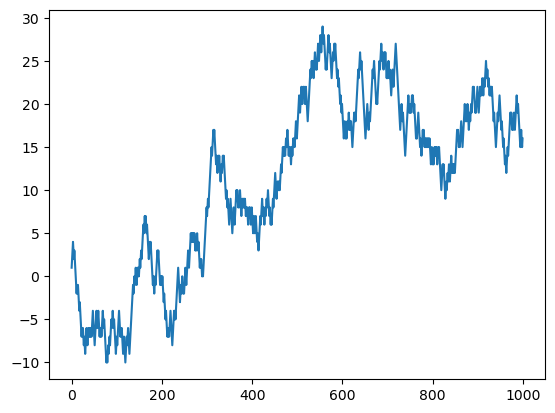

In [53]:
N = 1000  # Número de pasos
p = 0.5

posiciones = simular_caminata_aleatoria(N,p)

plt.plot(range(N), posiciones)

### Inciso b)
Ahora, convierte tu programa del ejercicio anterior en una funcion y usala para generar 100 caminatas aleatorias y haz una sola grafica de las posiciones de todas las caminatas vs el tiempo t. Asimismo, grafica un unico histograma de la frecuencia de las posiciones, de todas las caminatas. ¿Que es lo que observas?,¿cual es la diferencia con lo que obtuviste ene el ejercicio anterior?

In [54]:
N= 1000
P=0.5
num_cam= 100

Todas_caminatas= []

for _ in range(num_cam):
    caminata= simular_caminata_aleatoria(N,p)
    Todas_caminatas.append(caminata)

Todas_caminatas = np.array(Todas_caminatas)
print(Todas_caminatas)

[[ -1.  -2.  -3. ... -52. -53. -52.]
 [ -1.   0.  -1. ... -68. -67. -68.]
 [ -1.  -2.  -1. ...  52.  53.  52.]
 ...
 [ -1.   0.   1. ...  20.  21.  22.]
 [ -1.  -2.  -1. ...  40.  39.  40.]
 [ -1.  -2.  -1. ... -20. -21. -20.]]


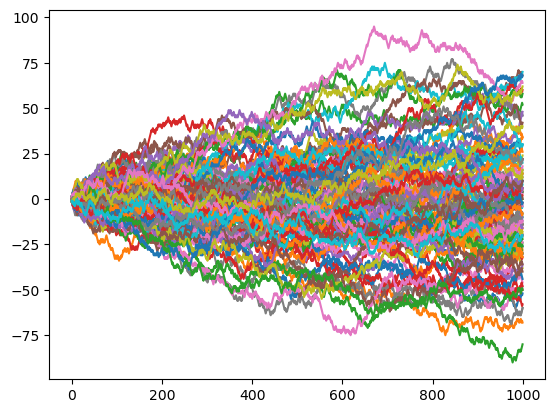

In [55]:
for caminata in Todas_caminatas:
    plt.plot(range(N), caminata)

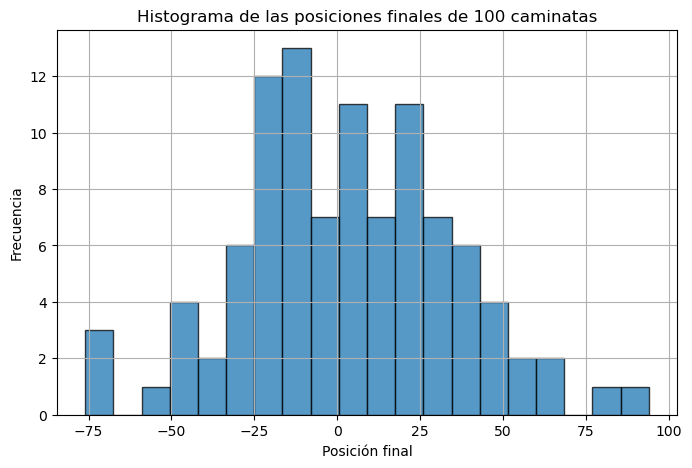

In [ ]:
posiciones_finales = Todas_caminatas[:, -1]  # Posiciones finales de cada caminata
plt.figure(figsize=(8, 5))
plt.hist(posiciones_finales, bins=20, edgecolor='black', alpha=0.75)
plt.title('Histograma de las posiciones finales de 100 caminatas')
plt.xlabel('Posición final')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Inciso c) 
Finalmente, generaliza tu programa para crea una funcion para simular una (ovarias caminatas) aleatorias en 2D y 3D, y usalas para graficar las posiciones (x, y) o (x, y, z) de una o varias caminatas.

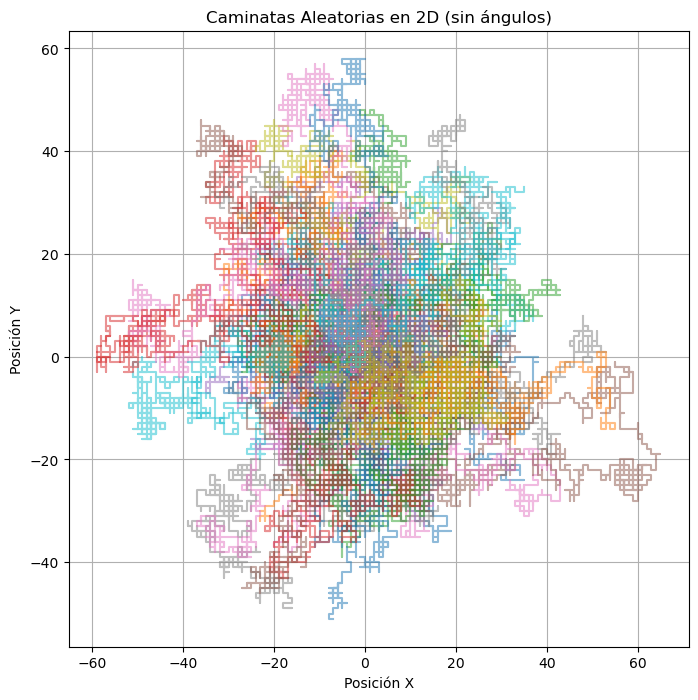

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def simular_caminata_aleatoria_2D(N, p, l=1):
    x_actual, y_actual = 0, 0
    posiciones_x = np.zeros(N)
    posiciones_y = np.zeros(N)

    for i in range(N):
        r = np.random.rand()

        if r < 0.5:
            if np.random.rand() < p:
                x_actual += l
            else:
                x_actual -= l
        else:
            if np.random.rand() < p:
                y_actual += l
            else:
                y_actual -= l

        posiciones_x[i] = x_actual
        posiciones_y[i] = y_actual

    return posiciones_x, posiciones_y

N = 1000
p = 0.5
num_cam = 100

plt.figure(figsize=(8, 8))
for _ in range(num_cam):
    posiciones_x, posiciones_y = simular_caminata_aleatoria_2D(N, p)
    plt.plot(posiciones_x, posiciones_y, alpha=0.5)

plt.title('Caminatas Aleatorias en 2D (sin ángulos)')
plt.xlabel('Posición X')
plt.ylabel('Posición Y')
plt.grid(True)
plt.show()


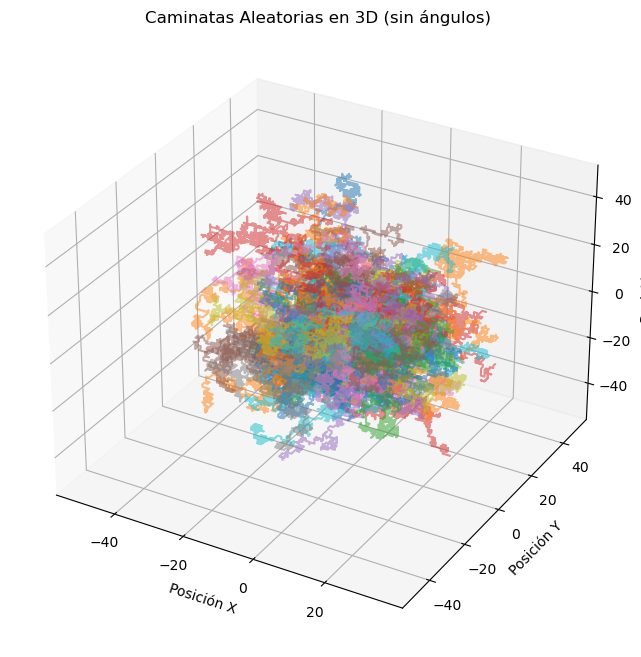

In [58]:
from mpl_toolkits.mplot3d import Axes3D

def simular_caminata_aleatoria(N, p, l=1):
    x_actual, y_actual, z_actual = 0, 0, 0
    posiciones_x = np.zeros(N)
    posiciones_y = np.zeros(N)
    posiciones_z = np.zeros(N)

    for i in range(N):
        r = np.random.rand()
        if r < 1/3:  # 33% de probabilidad de moverse en x
            if np.random.rand() < p:
                x_actual += l
            else:
                x_actual -= l
        elif r < 2/3:
            if np.random.rand() < p:
                y_actual += l
            else:
                y_actual -= l
        else:
            if np.random.rand() < p:
                z_actual += l
            else:
                z_actual -= l

        posiciones_x[i] = x_actual
        posiciones_y[i] = y_actual
        posiciones_z[i] = z_actual

    return posiciones_x, posiciones_y, posiciones_z

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for _ in range(num_cam):
    posiciones_x, posiciones_y, posiciones_z = simular_caminata_aleatoria(N, p)
    ax.plot(posiciones_x, posiciones_y, posiciones_z, alpha=0.5)

ax.set_title('Caminatas Aleatorias en 3D (sin ángulos)')
ax.set_xlabel('Posición X')
ax.set_ylabel('Posición Y')
ax.set_zlabel('Posición Z')
plt.show()


# Ejercicio 4: La gráfica de Feigenbaum

### Inciso a) 
Apoyate en el programa que vimos en clase y escribe un programa que muestre el comportamiento del mapeo log ́ıstico mediante una grafica.  ́

In [59]:
def mapeo_logistico(x, r, n_iteraciones):

  secuencia = [x]
  for _ in range(n_iteraciones):
    x = r * x * (1 - x)
    secuencia.append(x)
  return secuencia

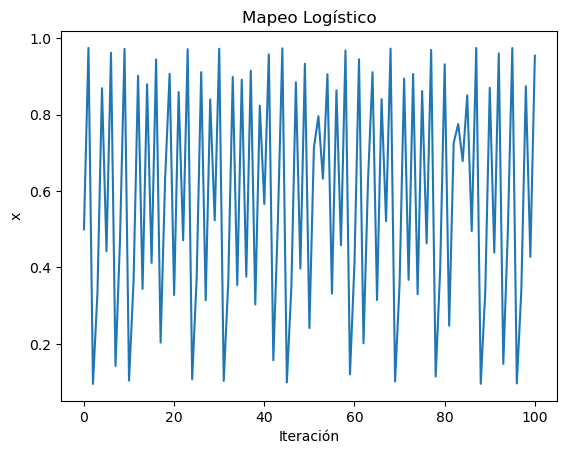

In [60]:
r= 3.9
x_inicial = 0.5
n_iteraciones = 100

secuencia = mapeo_logistico(x_inicial, r, n_iteraciones)

plt.plot(secuencia)
plt.xlabel("Iteración")
plt.ylabel("x")
plt.title("Mapeo Logístico")
plt.show()


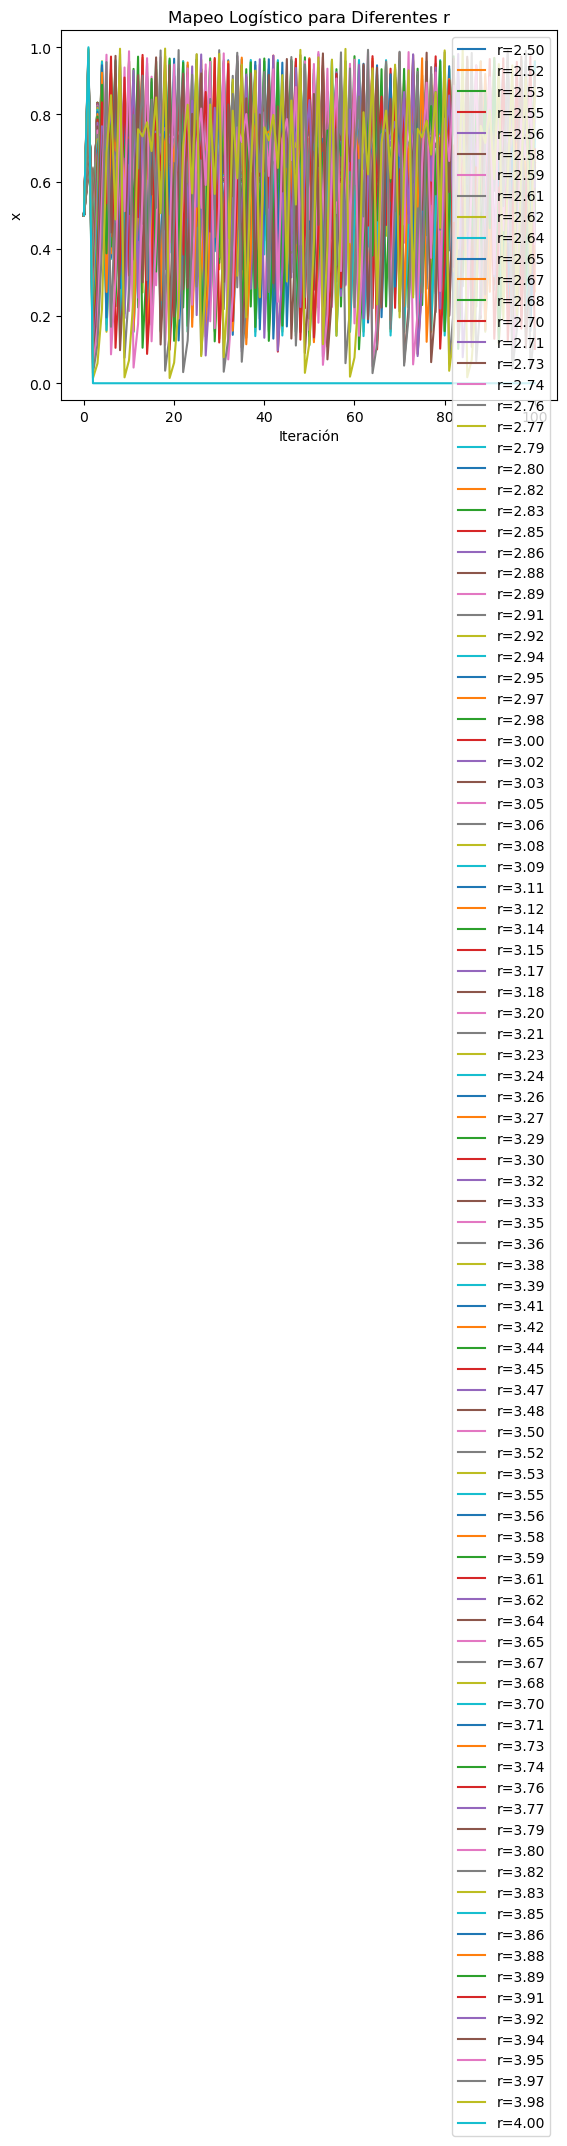

In [61]:
r_values = np.linspace(2.5, 4.0, 100)
n_iteraciones = 100
x_inicial = 0.5

for r in r_values:
    secuencia = mapeo_logistico(x_inicial, r, n_iteraciones)
    plt.plot(secuencia, label=f"r={r:.2f}")

plt.xlabel("Iteración")
plt.ylabel("x")
plt.title("Mapeo Logístico para Diferentes r")
plt.legend()
plt.show()


### Opcional (para 1.5 puntos extra):


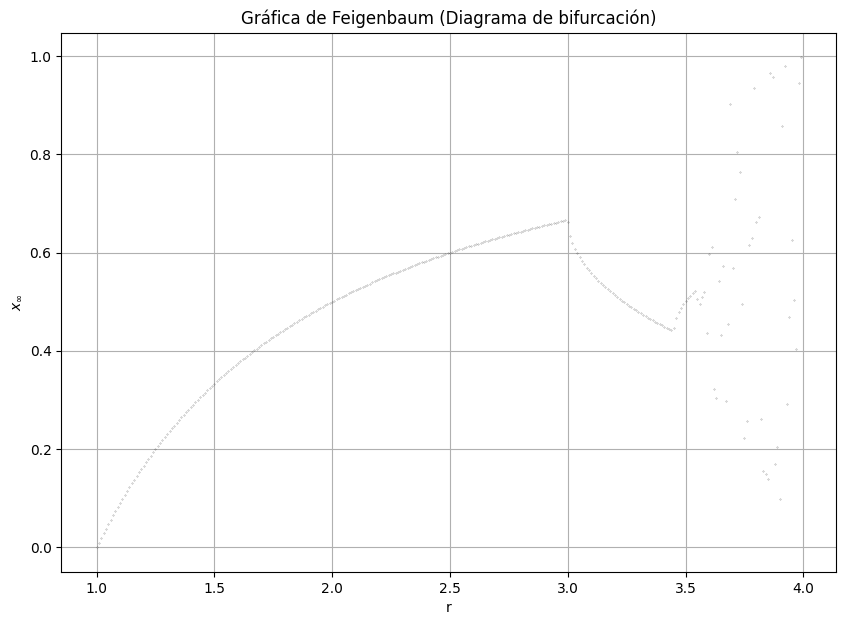

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N_iter_trans = 1000
N_iter_finales = 1000
r_values = np.arange(1.0, 4.0, 0.01)
x_inicial = 0.5

x = np.full_like(r_values, x_inicial)

for _ in range(N_iter_trans):
    x = r_values * x * (1 - x)

x_final = np.copy(x)
for _ in range(N_iter_finales):
    x_final = r_values * x_final * (1 - x_final)

plt.figure(figsize=(10, 7))
plt.plot(r_values, x_final, 'k.', markersize=0.5, alpha=0.5)

plt.title('Gráfica de Feigenbaum (Diagrama de bifurcación)')
plt.xlabel('r')
plt.ylabel('$x_\infty$')
plt.grid(True)
plt.show()


# Ejercicio 5: El conjunto de Mandelbrot



### Inciso a)

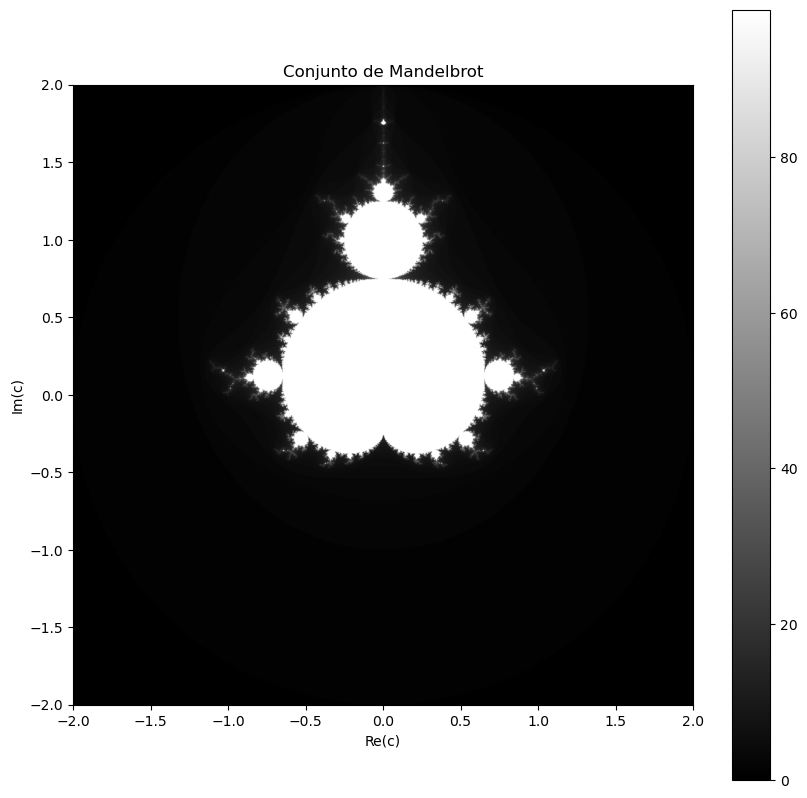

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N = 1000  # Tamaño de la cuadrícula
max_iter = 100  # Número máximo de iteraciones
x_min, x_max = -2, 2  # Rango en el eje x
y_min, y_max = -2, 2  # Rango en el eje y

# Crear la cuadrícula de números complejos
x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
C = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
C = C[:, 0] + 1j * C[:, 1]  # Convertir a números complejos

# Inicializar el arreglo para los conteos de iteraciones
Z = np.zeros_like(C)
divergence = np.zeros(C.shape, dtype=int)

# Iterar para calcular el conjunto de Mandelbrot
for i in range(max_iter):
    mask = np.abs(Z) <= 2  # Mantener los valores que no divergen
    divergence[mask] = i  # Guardar el número de iteraciones
    Z[mask] = Z[mask]**2 + C[mask]  # Actualizar Z

# Crear la imagen
plt.figure(figsize=(10, 10))
plt.imshow(divergence.reshape(N, N), extent=(x_min, x_max, y_min, y_max), cmap='gray', interpolation='bilinear')
plt.colorbar()
plt.title("Conjunto de Mandelbrot")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.show()



### Opcional (para 1.5 puntos extra):

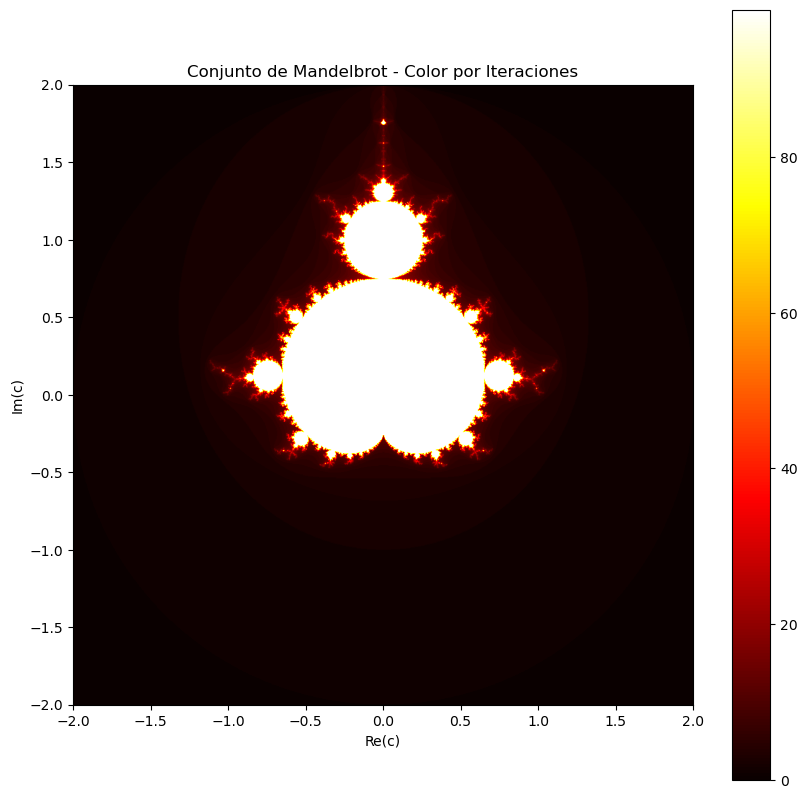

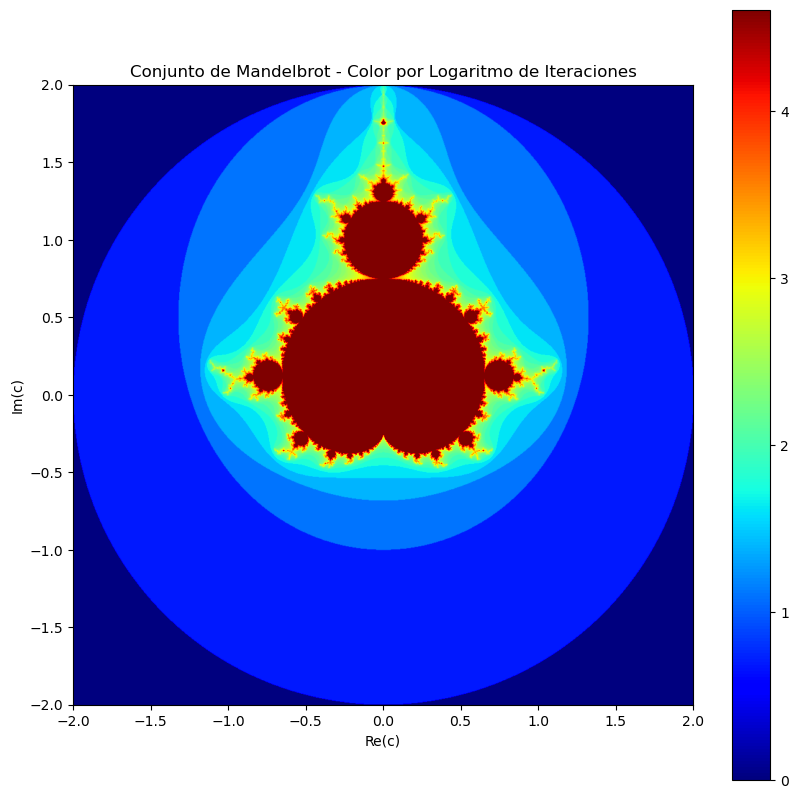

In [65]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
max_iter = 100
x_min, x_max = -2, 2
y_min, y_max = -2, 2

x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
C = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
C = C[:, 0] + 1j * C[:, 1]

Z = np.zeros_like(C)
divergence = np.zeros(C.shape, dtype=int)

for i in range(max_iter):
    mask = np.abs(Z) <= 2
    divergence[mask] = i
    Z[mask] = Z[mask]**2 + C[mask]

plt.figure(figsize=(10, 10))
plt.imshow(divergence.reshape(N, N), extent=(x_min, x_max, y_min, y_max), cmap='hot', interpolation='bilinear')
plt.colorbar()
plt.title("Conjunto de Mandelbrot - Color por Iteraciones")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.show()

log_divergence = np.log(divergence + 1)

plt.figure(figsize=(10, 10))
plt.imshow(log_divergence.reshape(N, N), extent=(x_min, x_max, y_min, y_max), cmap='jet', interpolation='bilinear')
plt.colorbar()
plt.title("Conjunto de Mandelbrot - Color por Logaritmo de Iteraciones")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.show()
